In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!rm -r /content/augmented_ecg_images_balanced


rm: cannot remove '/content/augmented_ecg_images_balanced': No such file or directory


In [3]:
!unzip "/content/drive/MyDrive/ECG_Project/augmented_ecg_images_balanced.zip" -d "/content/augmented_ecg_images_balanced"


Streaming output truncated to the last 5000 lines.
  inflating: /content/augmented_ecg_images_balanced/augmented_ecg_images_balanced/History_of_MI/PMI(165)_aug1.png  
  inflating: /content/augmented_ecg_images_balanced/augmented_ecg_images_balanced/History_of_MI/PMI(165)_aug10.png  
  inflating: /content/augmented_ecg_images_balanced/augmented_ecg_images_balanced/History_of_MI/PMI(165)_aug11.png  
  inflating: /content/augmented_ecg_images_balanced/augmented_ecg_images_balanced/History_of_MI/PMI(165)_aug12.png  
  inflating: /content/augmented_ecg_images_balanced/augmented_ecg_images_balanced/History_of_MI/PMI(165)_aug2.png  
  inflating: /content/augmented_ecg_images_balanced/augmented_ecg_images_balanced/History_of_MI/PMI(165)_aug3.png  
  inflating: /content/augmented_ecg_images_balanced/augmented_ecg_images_balanced/History_of_MI/PMI(165)_aug4.png  
  inflating: /content/augmented_ecg_images_balanced/augmented_ecg_images_balanced/History_of_MI/PMI(165)_aug5.png  
  inflating: /cont

In [4]:
!mv /content/augmented_ecg_images_balanced/augmented_ecg_images_balanced/* /content/augmented_ecg_images_balanced/
!rm -r /content/augmented_ecg_images_balanced/augmented_ecg_images_balanced


In [5]:
import os
print(os.listdir("/content/augmented_ecg_images_balanced"))


['Myocardial_Infarction', 'Normal', 'Abnormal_Heartbeat', 'History_of_MI']


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define optimized model
optimized_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(384, 384, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    GlobalAveragePooling2D(),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(4, activation='softmax')  # 4 classes
])

# Compile model
optimized_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Show summary
optimized_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 382, 382, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 382, 382, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 191, 191, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 189, 189, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 189, 189, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 94, 94, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 92, 92, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 92, 92, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 46, 46, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,660 (401.02 KB)

 Trainable params: 102,212 (399.27 KB)

 Non-trainable params: 448 (1.75 KB)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (384, 384)
batch_size = 32
dataset_path = "/content/augmented_ecg_images_balanced"

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)


Found 6564 images belonging to 4 classes.
Found 1640 images belonging to 4 classes.


In [8]:
history_opt = optimized_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 81s 322ms/step - accuracy: 0.3581 - loss: 1.4141 - val_accuracy: 0.1732 - val_loss: 1.5210
Epoch 2/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 57s 277ms/step - accuracy: 0.4680 - loss: 1.1696 - val_accuracy: 0.2530 - val_loss: 1.6629
Epoch 3/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 57s 275ms/step - accuracy: 0.5267 - loss: 1.0898 - val_accuracy: 0.5018 - val_loss: 1.1434
Epoch 4/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 56s 271ms/step - accuracy: 0.5958 - loss: 0.9822 - val_accuracy: 0.6061 - val_loss: 0.9941
Epoch 5/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 57s 276ms/step - accuracy: 0.6374 - loss: 0.9010 - val_accuracy: 0.5567 - val_loss: 0.9725
Epoch 6/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 57s 275ms/step - accuracy: 0.6798 - loss: 0.8421 - val_accuracy: 0.6982 - val_loss: 0.8381
Epoch 7/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 57s 278ms/step - accuracy: 0.7143 - loss: 0.7634 - val_accuracy: 0.7067 - val_loss: 0.7554
Epoch 8/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 57s 276ms/step - accuracy: 0.7240 - loss: 0

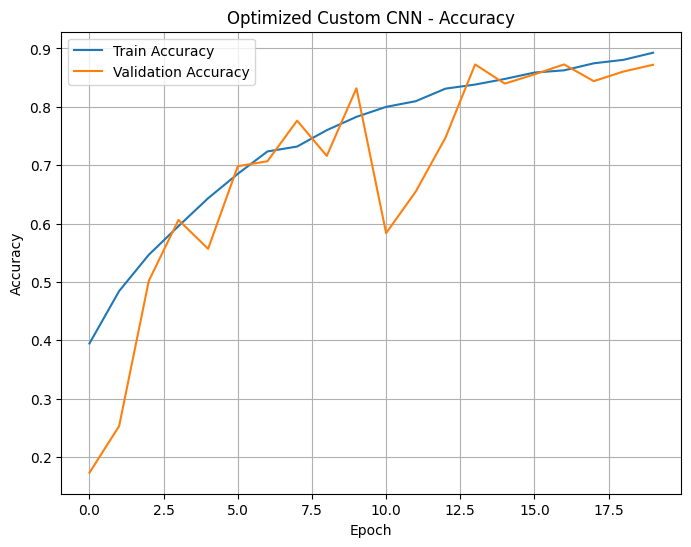

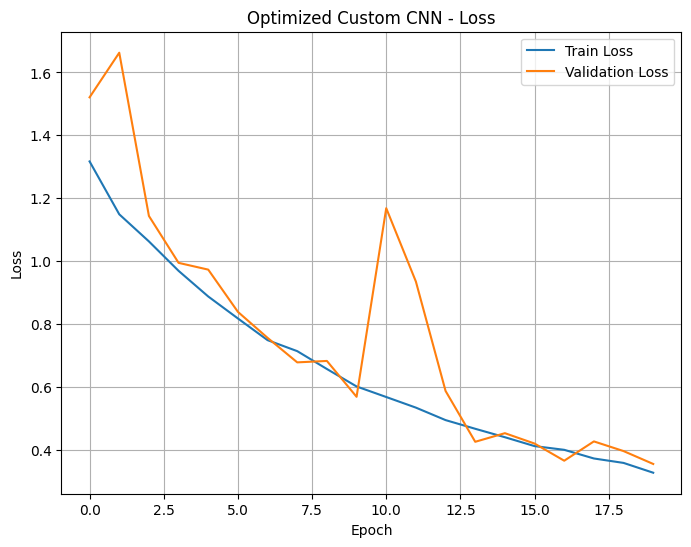

In [9]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(8, 6))
plt.plot(history_opt.history['accuracy'], label='Train Accuracy')
plt.plot(history_opt.history['val_accuracy'], label='Validation Accuracy')
plt.title('Optimized Custom CNN - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.figure(figsize=(8, 6))
plt.plot(history_opt.history['loss'], label='Train Loss')
plt.plot(history_opt.history['val_loss'], label='Validation Loss')
plt.title('Optimized Custom CNN - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 270ms/step


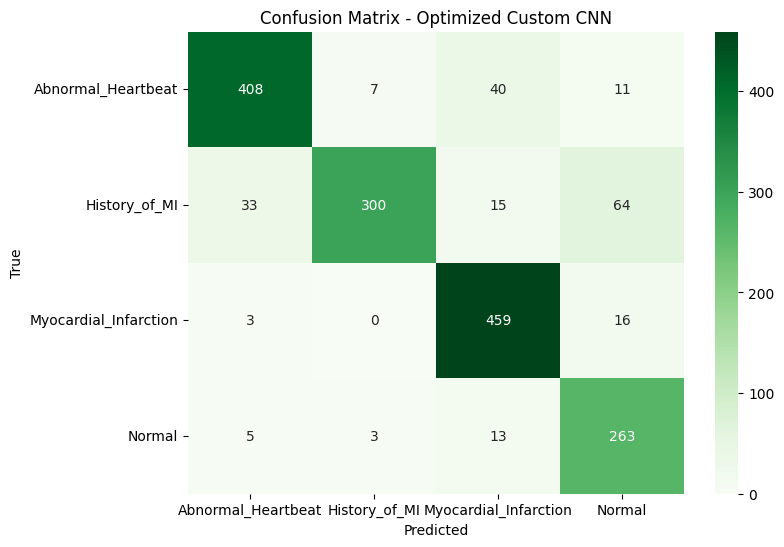

Classification Report:

                       precision    recall  f1-score   support

   Abnormal_Heartbeat       0.91      0.88      0.89       466
        History_of_MI       0.97      0.73      0.83       412
Myocardial_Infarction       0.87      0.96      0.91       478
               Normal       0.74      0.93      0.82       284

             accuracy                           0.87      1640
            macro avg       0.87      0.87      0.87      1640
         weighted avg       0.88      0.87      0.87      1640



In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predictions
Y_pred_probs_opt = optimized_model.predict(val_gen)
Y_pred_classes_opt = np.argmax(Y_pred_probs_opt, axis=1)
Y_true = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(Y_true, Y_pred_classes_opt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Optimized Custom CNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
report_dict = classification_report(
    Y_true, Y_pred_classes_opt, target_names=class_labels, output_dict=True, zero_division=0
)
print("Classification Report:\n")
print(classification_report(Y_true, Y_pred_classes_opt, target_names=class_labels))


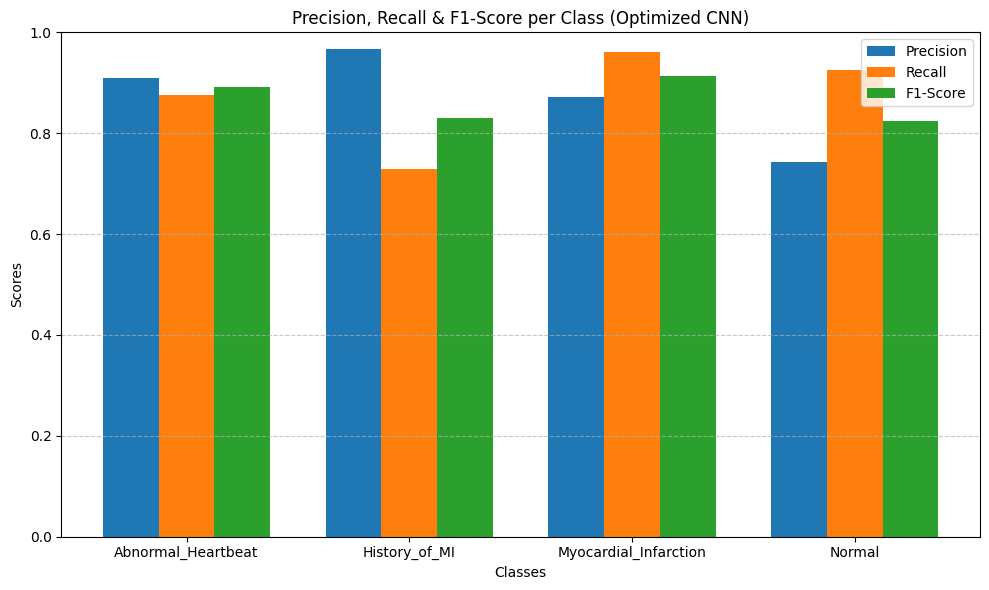

In [11]:
# Safe parsing of metrics
precision = []
recall = []
f1_score = []

for label in class_labels:
    if label in report_dict:
        precision.append(report_dict[label]["precision"])
        recall.append(report_dict[label]["recall"])
        f1_score.append(report_dict[label]["f1-score"])
    else:
        precision.append(0.0)
        recall.append(0.0)
        f1_score.append(0.0)

# Plot bar chart
x = np.arange(len(class_labels))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1_score, width, label='F1-Score')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Precision, Recall & F1-Score per Class (Optimized CNN)')
plt.xticks(x, class_labels)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


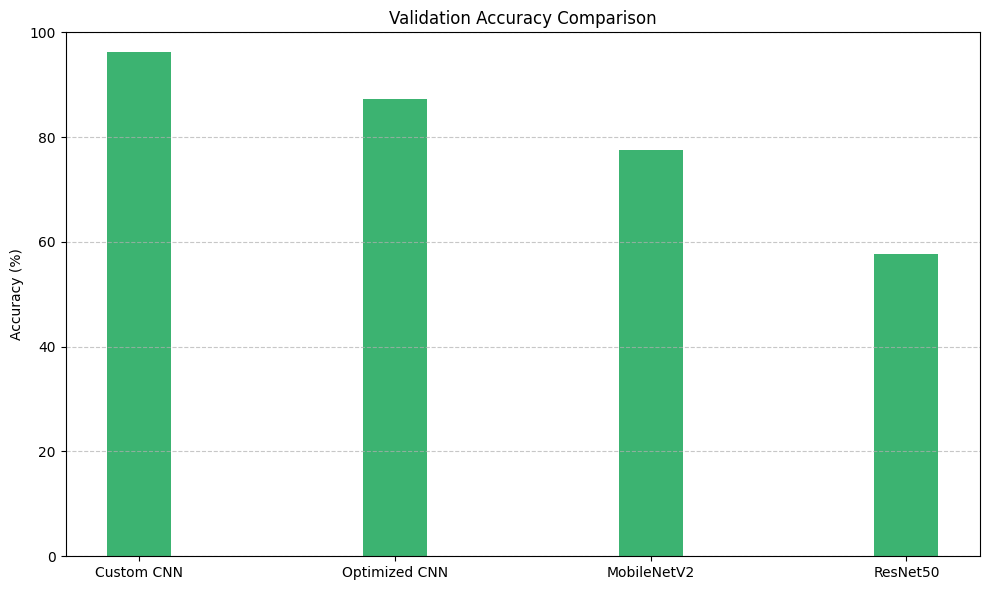

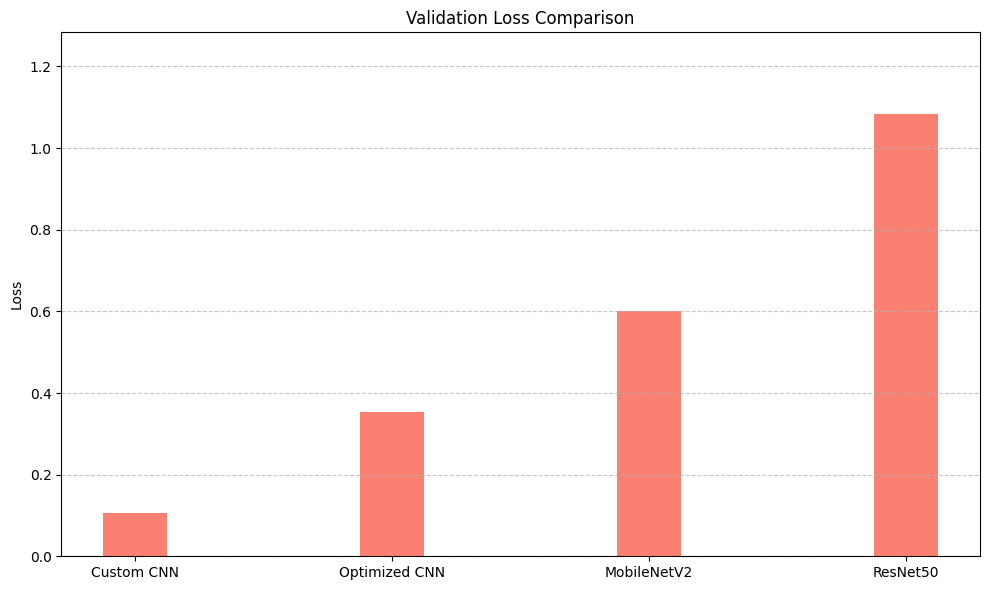

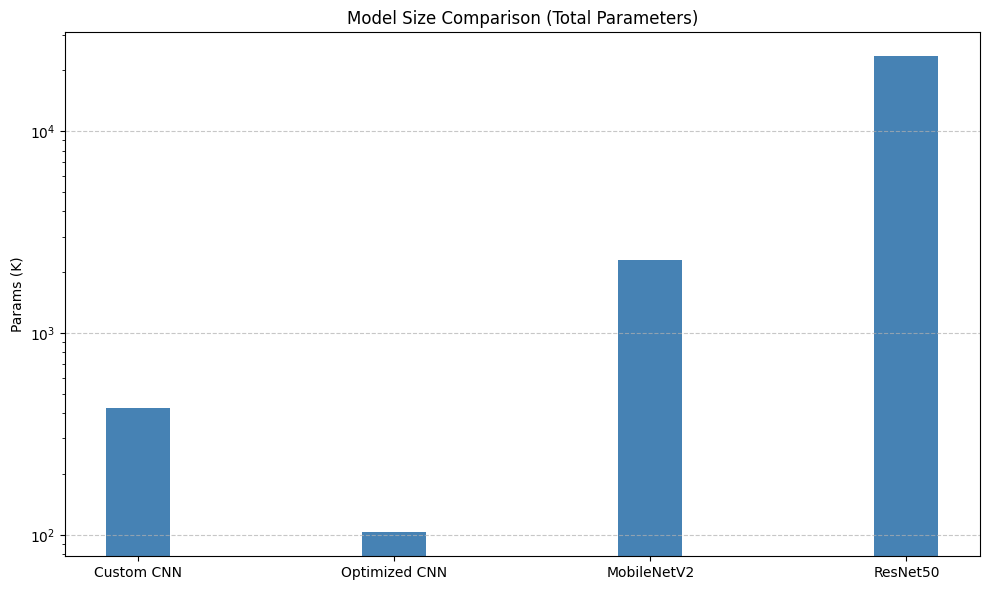

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Model Names
models = ['Custom CNN', 'Optimized CNN', 'MobileNetV2', 'ResNet50']

# Validation Accuracy
val_acc = [96.16, 87.20, 77.62, 57.74]

# Validation Loss
val_loss = [0.1049, 0.3539, 0.6016, 1.0837]

# Total Parameters (in thousands for display)
params_k = [423.7, 102.6, 2300, 23500]  # MobileNetV2 and ResNet50 are approx

x = np.arange(len(models))
width = 0.25

# Validation Accuracy Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(x, val_acc, width, color='mediumseagreen')
plt.title('Validation Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.xticks(x, models)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Validation Loss Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(x, val_loss, width, color='salmon')
plt.title('Validation Loss Comparison')
plt.ylabel('Loss')
plt.xticks(x, models)
plt.ylim(0, max(val_loss) + 0.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Parameter Size Bar Chart (Log Scale for clarity)
plt.figure(figsize=(10, 6))
plt.bar(x, params_k, width, color='steelblue')
plt.title('Model Size Comparison (Total Parameters)')
plt.ylabel('Params (K)')
plt.xticks(x, models)
plt.yscale('log')  # Log scale to handle large gaps
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [13]:
optimized_model.save("/content/optimized_custom_model.h5")
print("Optimized model saved successfully!")


Optimized model saved successfully!


In [14]:
from google.colab import files
files.download("/content/optimized_custom_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>